<a href="https://colab.research.google.com/github/suahplanet/ITB-assingnment-2/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_1911888_%EC%84%B1%EC%88%98%EC%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import mglearn as mg

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%matplotlib inline
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", index_col='가입자일련번호')

print(df.columns)
display(df.info())
display(df.head()) 

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [8]:
df.describe()

,기준년도,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [9]:
df.rename(columns = {'성별코드':'성별', '연령대코드(5세단위)':'연령대', '체중(5Kg 단위)':'체중', '신장(5Cm단위)':'신장'}, inplace = True)

display(df)

,기준년도,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2020,44,F,13,155,55,83.0,1.2,1.2,1,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9997,2020,43,F,11,160,55,77.5,1.0,1.2,1,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9998,2020,45,M,12,160,80,93.0,0.6,0.6,1,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021


In [10]:
print(df.isnull().sum())

기준년도             0
시도코드             0
성별               0
연령대              0
신장               0
체중               0
허리둘레             0
시력(좌)            0
시력(우)            0
청력(좌)            0
청력(우)            0
수축기혈압           88
이완기혈압           88
식전혈당(공복혈당)      88
총콜레스테롤        5956
트리글리세라이드      5956
HDL콜레스테롤      5956
LDL콜레스테롤      6023
혈색소             88
요단백            139
혈청크레아티닌         88
(혈청지오티)AST      88
(혈청지오티)ALT      88
감마지티피           88
흡연상태             2
음주여부             1
구강검진수검여부         0
치아우식증유무       6749
치석            6749
데이터공개일자          0
dtype: int64


고LDL혈증은 170mg/dL로 보기 때문에, 

LDL 콜레스테롤 170 이상을 Y, 170 미만을 N으로 변경하고자 한다. 

LDL 콜레스테롤 수치가 170 이상, 170 이하인 경우, 즉 고LDL혈증 여부를 종속변수로 정하고 

건강검진정보 샘플에 포함된 내용 중 나이, 성별, 흡연상태, 음주 여부, 고혈압, BMI(체중과 신장을 이용한 파생변수) 등을 독립변수로 지정하여, 고LDL혈증에 가장 많은 영향을 미치는 요인이 무엇인지 알아보고자 했습니다. 

In [11]:
df['종속비만'] = round(df['체중'] / (df['신장'] / 100) **2, 1)
df.head()

,기준년도,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.0
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.9
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.9
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.3
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.8


In [12]:
df['종속비만'] = df['종속비만'].apply(lambda x : 'Yes' if x >= 25 else 'No')
df.head()

,기준년도,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,No
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,Yes
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,No
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,Yes
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,No


No     5944
Yes    4056
Name: 종속비만, dtype: int64


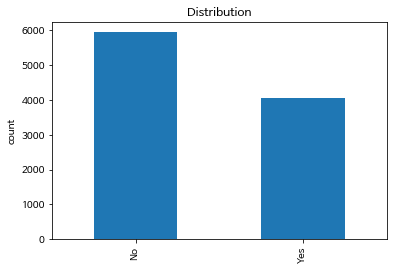

In [13]:
print(df['종속비만'].value_counts())

df['종속비만'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution')
plt.show()

In [14]:
df['성별'].replace("M", 0, inplace=True)
df['성별'].replace("F", 1, inplace=True)
df.head()

,기준년도,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,0,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,No
2,2020,27,1,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,Yes
3,2020,11,1,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,No
4,2020,31,0,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,Yes
5,2020,41,1,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,No


In [15]:
df['음주여부'].replace("Yes", 1, inplace=True)
df['음주여부'].replace("No", 0, inplace=True)
df.head()

,기준년도,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,0,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,0.0,0,NaN,NaN,12/29/2021,No
2,2020,27,1,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,0.0,0,NaN,NaN,12/29/2021,Yes
3,2020,11,1,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,0.0,0,NaN,NaN,12/29/2021,No
4,2020,31,0,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,0.0,1,0.0,0.0,12/29/2021,Yes
5,2020,41,1,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,0.0,0,NaN,NaN,12/29/2021,No


In [16]:
df['흡연상태'].replace("No", 0, inplace=True)
df['흡연상태'].replace("Yes", 1, inplace=True)
df['흡연상태'].replace("NotNow", 2, inplace=True)

df.head()

,기준년도,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,종속비만
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,0,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,0.0,0.0,0,NaN,NaN,12/29/2021,No
2,2020,27,1,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,0.0,0.0,0,NaN,NaN,12/29/2021,Yes
3,2020,11,1,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,0.0,0.0,0,NaN,NaN,12/29/2021,No
4,2020,31,0,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,0.0,0.0,1,0.0,0.0,12/29/2021,Yes
5,2020,41,1,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,0.0,0.0,0,NaN,NaN,12/29/2021,No


In [17]:
df.describe()


,기준년도,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,9998.000000,9999.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,34.100100,0.486200,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,1.119461,0.848484,27.58979,26.789851,38.098668,0.569414,0.581958,0.325100,0.175331,0.579514
std,0.0,12.394581,0.499835,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,0.489782,0.301012,17.88442,23.735687,58.184579,0.794054,0.493262,0.468436,0.380308,0.591269
min,2020.0,11.000000,0.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,27.000000,0.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,41.000000,0.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2020.0,44.000000,1.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2020.0,49.000000,1.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,6.000000,9.200000,692.00000,1146.000000,2322.000000,2.000000,1.000000,1.000000,1.000000,2.000000


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Xy= df[['종속비만', '성별', '흡연상태', '음주여부', '연령대', '식전혈당(공복혈당)']]

Xy.head()


,종속비만,성별,흡연상태,음주여부,연령대,식전혈당(공복혈당)
가입자일련번호,,,,,,
1,No,0,0.0,0.0,9,90.0
2,Yes,1,0.0,0.0,13,87.0
3,No,1,0.0,0.0,12,102.0
4,Yes,0,0.0,0.0,13,146.0
5,No,1,0.0,0.0,12,110.0


In [19]:
print(Xy.shape)
print(Xy.isnull().sum()) #결측치 확인 

(10000, 6)
종속비만           0
성별             0
흡연상태           2
음주여부           1
연령대            0
식전혈당(공복혈당)    88
dtype: int64


In [20]:
Xy2 = Xy.dropna(axis=0)
Xy2.shape

print(Xy2.shape)

(9909, 6)


In [21]:

X = Xy2.iloc[:, 1:]
y = Xy2['종속비만'] # y = Xy.iloc[:0] 해도 됨

print(X.head())

print(y.head())

         성별  흡연상태  음주여부  연령대  식전혈당(공복혈당)
가입자일련번호                                 
1         0   0.0   0.0    9        90.0
2         1   0.0   0.0   13        87.0
3         1   0.0   0.0   12       102.0
4         0   0.0   0.0   13       146.0
5         1   0.0   0.0   12       110.0
가입자일련번호
1     No
2    Yes
3     No
4    Yes
5     No
Name: 종속비만, dtype: object


In [22]:
X.describe() 

,성별,흡연상태,음주여부,연령대,식전혈당(공복혈당)
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000
mean,0.485014,0.572005,0.585528,11.899082,103.781411
std,0.499801,0.794985,0.492655,2.145050,24.652491
min,0.000000,0.000000,0.000000,9.000000,55.000000
25%,0.000000,0.000000,0.000000,10.000000,91.000000
50%,0.000000,0.000000,1.000000,12.000000,99.000000
75%,1.000000,1.000000,1.000000,13.000000,109.000000
max,1.000000,2.000000,1.000000,18.000000,473.000000


# 1. 의사결정나무 모델

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth =4, random_state=0)  
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.619
시험용 데이터 정확도: 0.604


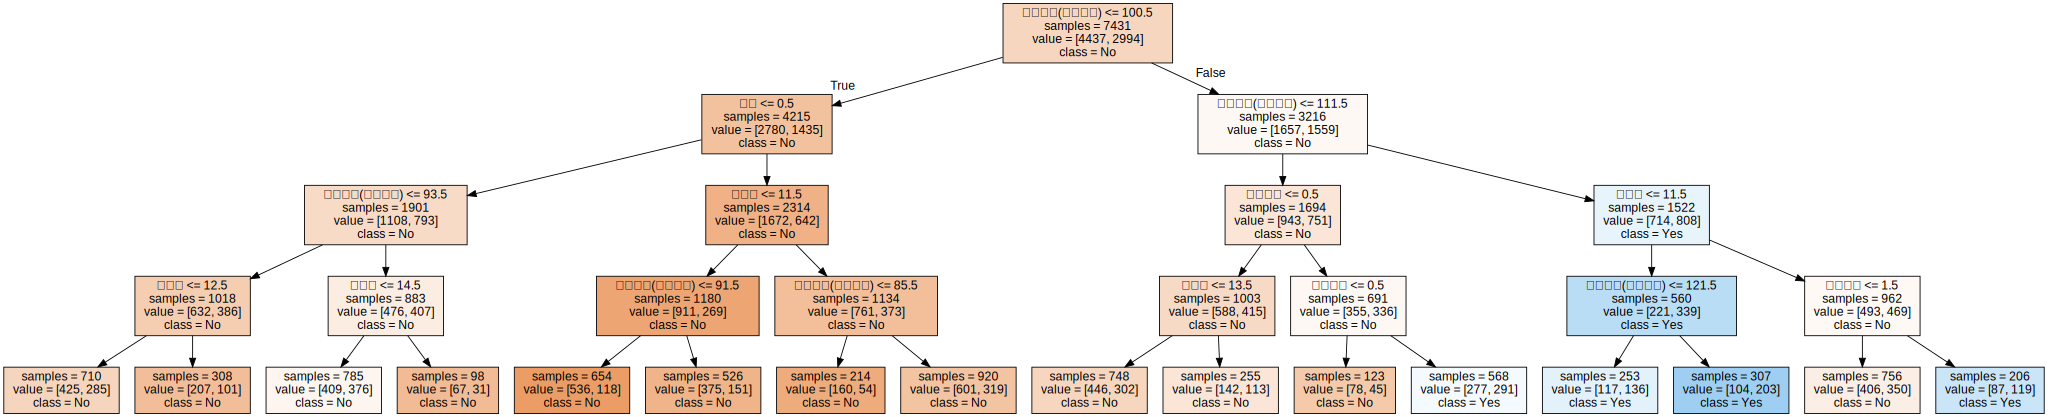

In [24]:
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "No", "Yes"],
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [25]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.21292008 0.04473958 0.02267282 0.15228181 0.56738572]


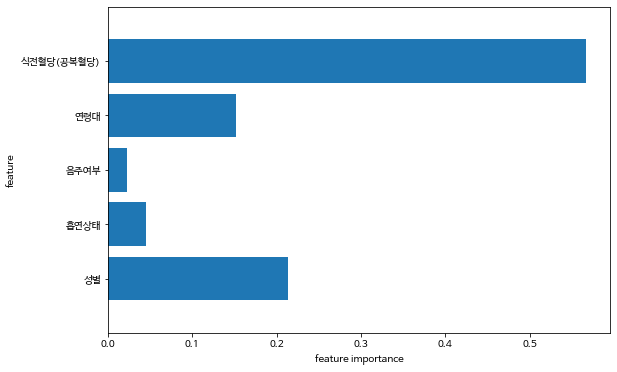

In [26]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns)  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns)   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree) # 의사결정 나무의 중요도 파악 

## 인사이트
- 다음과 같은 경우 비만으로 판정되었다. 
1. 음주와 흡연을 하며, 식전 혈당이 110.5 이상 111.5 이하인 경우
2. 식전혈당이 121.5 이상이며, 연령대 코드 기준 11(50~54세)이하인 경우
3. 식전혈당이 121.5 미만이나 연령대 코드 기준 11(50~54세)이하, 식전 혈당이 111.5보다 높은 경우
4. 흡연 경험이 있으며, 연령대 코드 기준 12(55~59세)이상, 식전혈당이 111.5 보다 높은 경우 

## 인사이트2
- 식전혈당(공복혈당)이 의사결정나무를 생성하는데 가장 비중이 큰 변수였다.
- 그 다음으로 비중이 큰 변수는 성별, 연령대이다. 

# 2. 그래디언트 부스팅 모델

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [28]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.633
시험용 데이터 세트 정확도: 0.614


- 그리드 서치를 이용해 그래디언트 부스팅 모델 검증

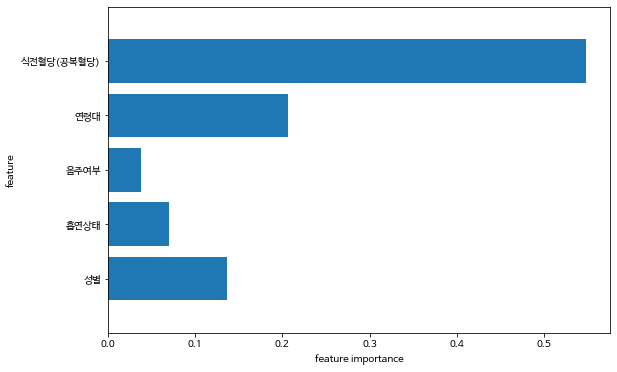

In [34]:
plot_feature_importances_wisc(gbrt2) # 그래디언트 파악


## 인사이트 
- 그래디언트 부스팅 모델에서 비만도에 가장 많은 영향을 미친 변수는 식전혈당(공복혈당)이다.
- 그 뒤를 연령대, 성별이 잇고 있다. 

## 그리드 서치를 통한 그래디언트 부스팅 모델 최적화

In [29]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[4, 5], 'learning_rate':[0.1,0.08]}

In [75]:

grid_gbrt = GridSearchCV(gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08], 'max_depth': [4, 5]})


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08], 'max_depth': [4, 5]})

In [31]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.08, 'max_depth': 4}
GridSearchCV 최고 정확도: 0.6088


In [32]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.611


In [33]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.08, max_depth=4)
gbrt2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.08, max_depth=4, random_state=0)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 


dt_pred = tree.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))

print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

Decision tree 시험용 데이터 세트 정확도:0.604
[[1232  219]
 [ 762  265]]
Gradient boosting 시험용 데이터 세트 정확도:0.611
[[1272  179]
 [ 785  242]]


# 3. 랜덤 포레스트 모델

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


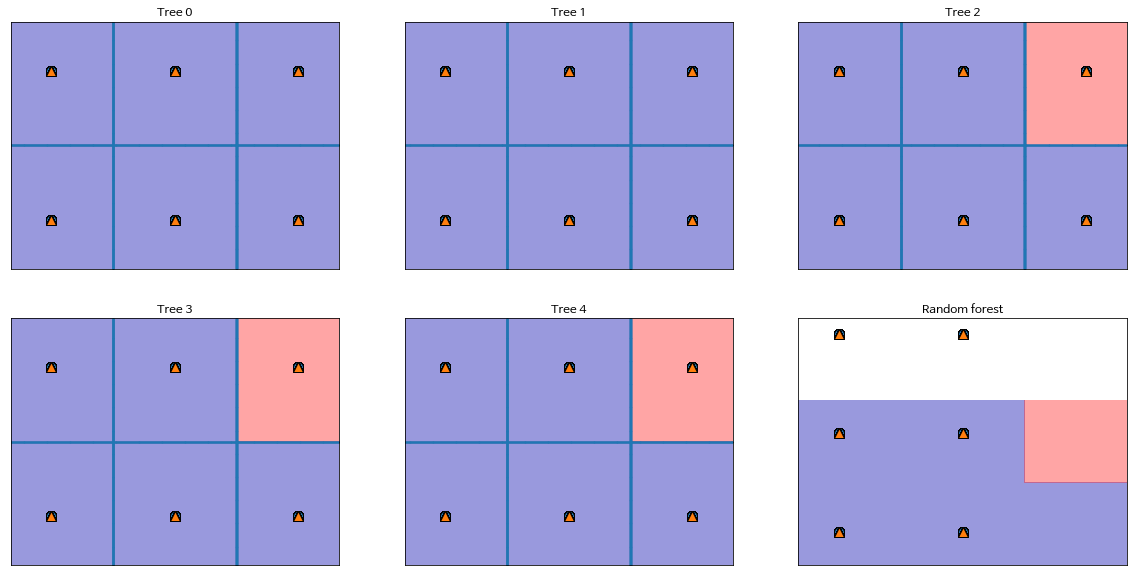

In [71]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:,1:3], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mg.plots.plot_tree_partition(X.iloc[:,1:3].values, y, tree, ax=ax)
    
mg.plots.plot_2d_separator(forest, X.iloc[:, 1:3].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mg.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


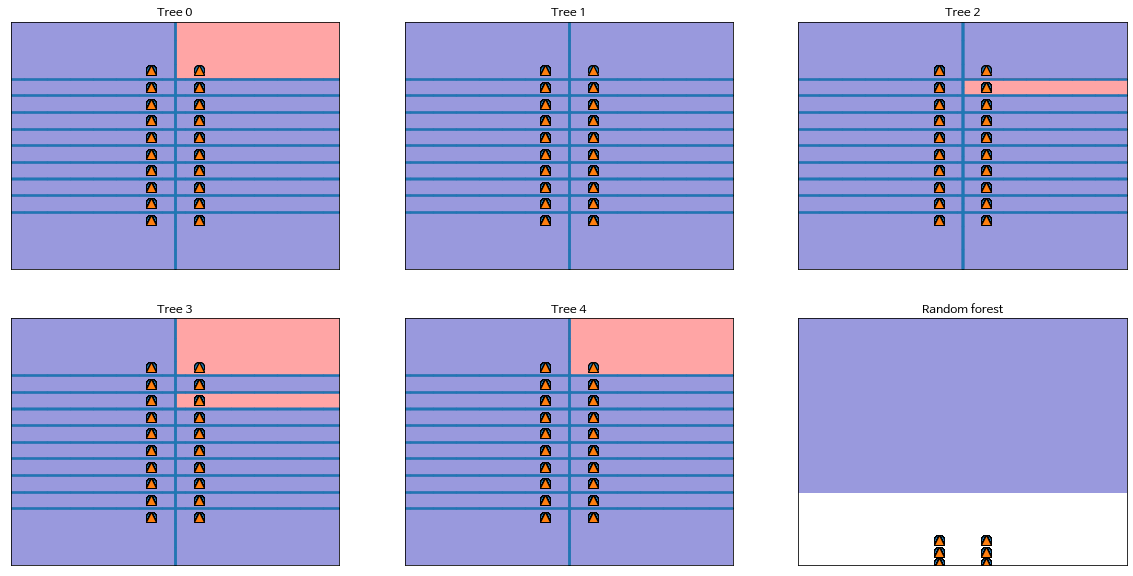

In [72]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:,2:4], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mg.plots.plot_tree_partition(X.iloc[:,2:4].values, y, tree, ax=ax)
    
mg.plots.plot_2d_separator(forest, X.iloc[:, 2:4].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mg.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


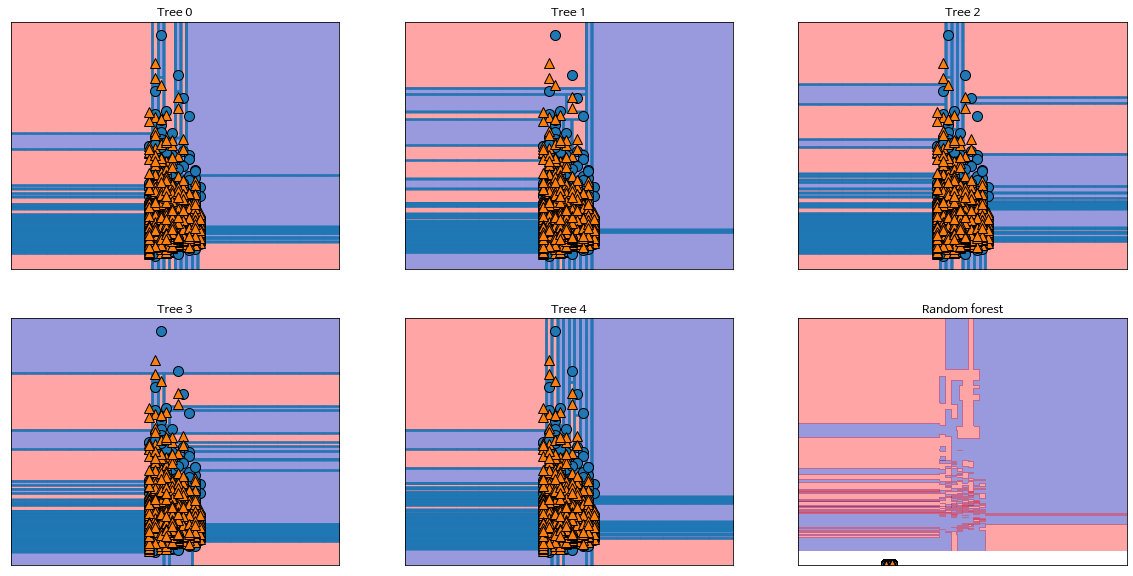

In [74]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:,3:5], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mg.plots.plot_tree_partition(X.iloc[:,3:5].values, y, tree, ax=ax)
    
mg.plots.plot_2d_separator(forest, X.iloc[:, 3:5].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mg.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [42]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.780
시험용 데이터 세트 정확도: 0.565


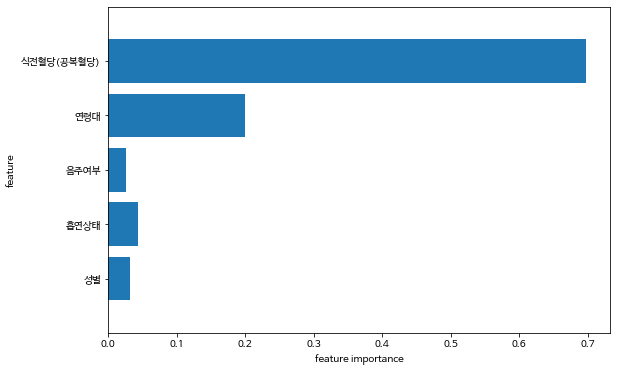

In [43]:
plot_feature_importances_wisc(forest)

## 인사이트 
- 식전혈당(공복혈당)을 제외한 변수는 0과 1로만 이루어져 있기 때문에 랜덤포레스트 모형이 간단하게 형성될 수 밖에 없다. 

- 랜덤포레스트 모델로 분류한 결과 비만도에 영향을 미친 가장 중요한 변수는 식전혈당(공복혈당)이었고, 그 다음으로 영향을 미친 변수는 연령대였다. 

- 의사결정나무와 그래디언트 부스팅과 비교했을 때 상대적으로 성별이 미치는 영향이 적었다. 

In [84]:
forest_pred = forest.predict(X_test)

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))

print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Random forest 시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
print(confusion_matrix(y_test, forest_pred))


Decision tree 시험용 데이터 세트 정확도:0.604
[[1232  219]
 [ 762  265]]
Gradient boosting 시험용 데이터 세트 정확도:0.611
[[1272  179]
 [ 785  242]]
Random forest 시험용 데이터 세트 정확도: 0.565
[[1016  435]
 [ 644  383]]


# 세 분류 모델에 대한 인사이트
- 가장 정확도가 높은 분류 모델은 그래디언트 부스팅 모델이다.
- 가장 정확도가 낮은 분류 모델은 랜덤 포레스트 모델이다. 